Notebook to generate the word clouds, requires `wordcloud` module. Note that this module uses the random number generator, so each pass generates a new word cloud (with the same words).

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet('PR_fit_EN_0_5_text_clean_stemmed_400_Count_0_005_0_4_WORDS.parquet')

In [4]:
df

,word,coef
604,disappoint,-0.027961
558,delay,-0.006116
1012,howev,-0.004983
338,challeng,-0.004463
1978,slower,-0.003200
...,...,...
1598,pleas,0.002737
1369,momentum,0.003291
755,exce,0.003359
756,exceed,0.004010


In [5]:
len(df)

2393

In [6]:
import numpy as np

In [7]:
# Generate fake weights
#df['coef'] = np.random.random(len(df)) * 2 - 1

In [8]:
# Wordcloud
from wordcloud import WordCloud

In [9]:
neg_words = np.abs(df[df.coef < 0].set_index('word')['coef']).to_dict()
pos_words = np.abs(df[df.coef > 0].set_index('word')['coef']).to_dict()

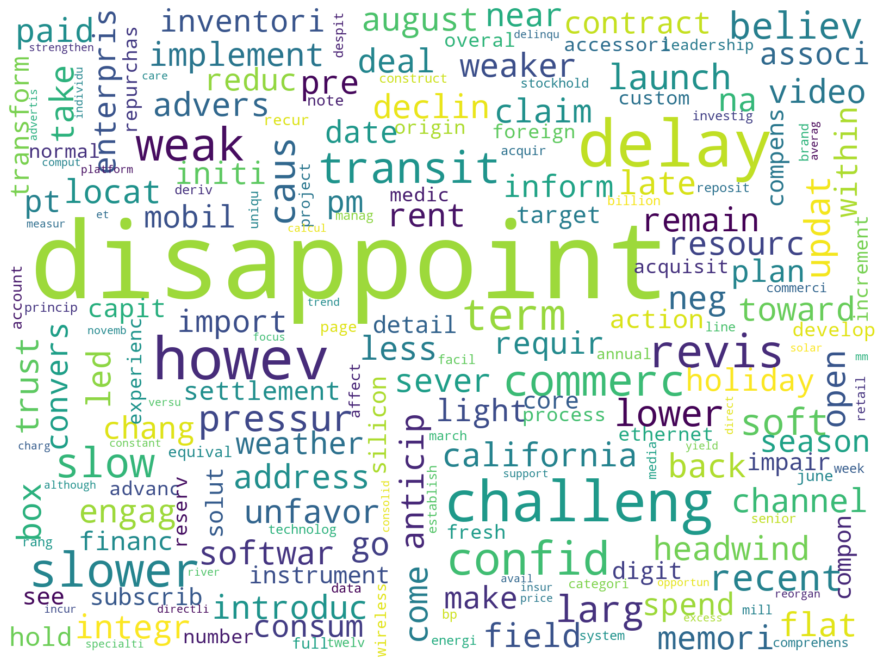

In [12]:
# Generate a word cloud image
wordcloud = WordCloud(
    background_color="white", width=400, height=300, scale=4.0
).fit_words(neg_words)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("neg_cloud.pdf", bbox_inches="tight")


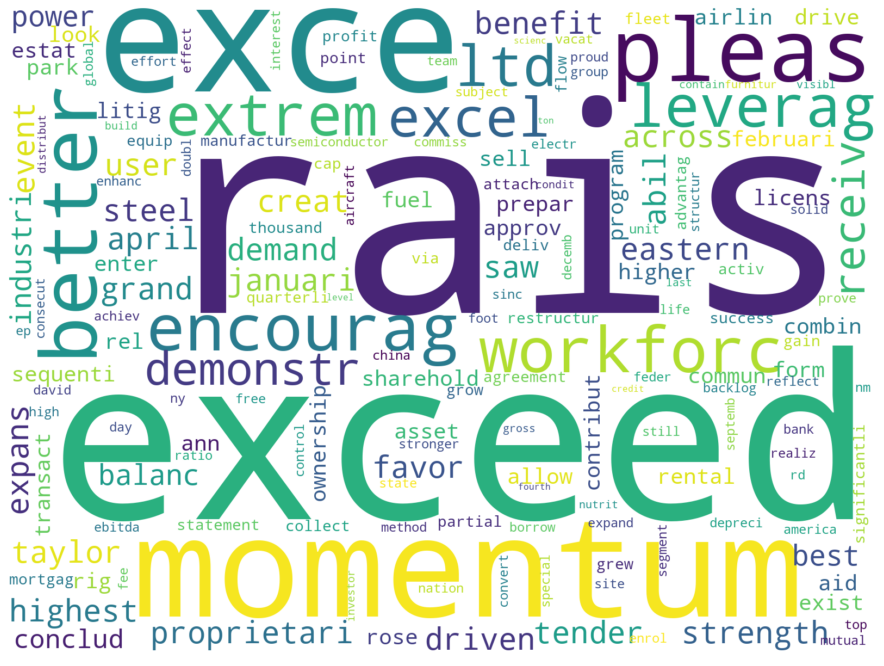

In [11]:
# Generate a word cloud image
wordcloud = WordCloud(
    background_color="white", width=400, height=300, scale=4.0
).fit_words(pos_words)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("pos_cloud.pdf", bbox_inches="tight")
